In [ ]:
import pandas as pd
df=pd.read_csv('Housing.csv')
df=df[[
'price',
'bedrooms',
'bathrooms',
'sqft_living',
'floors',
'waterfront',
'view',
'condition',
]]
df = df.dropna() 
df=df.drop_duplicates()


21463


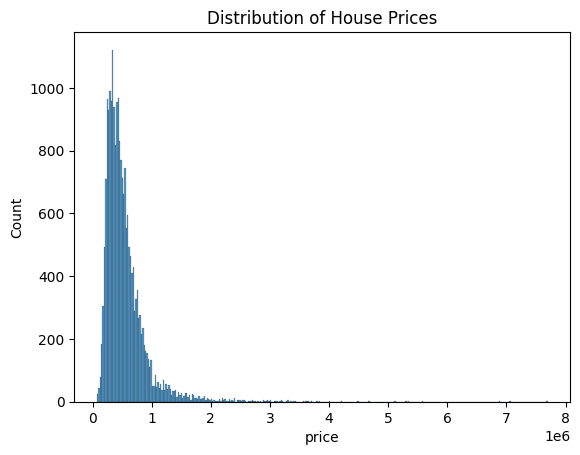

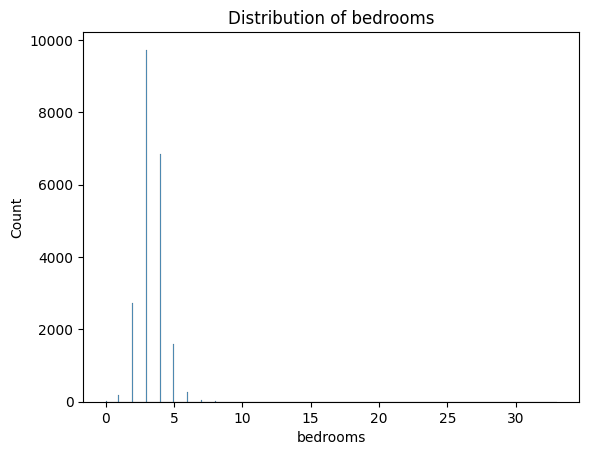

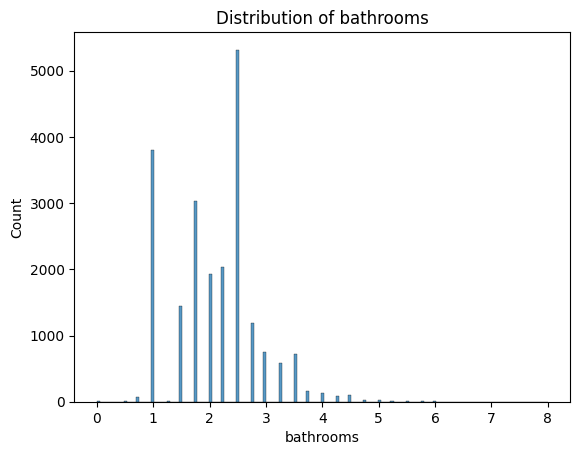

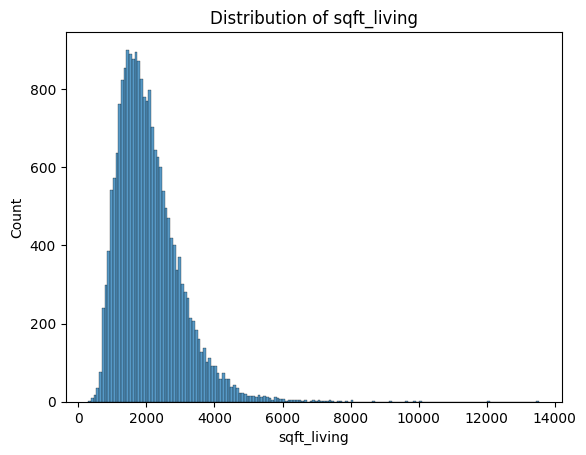

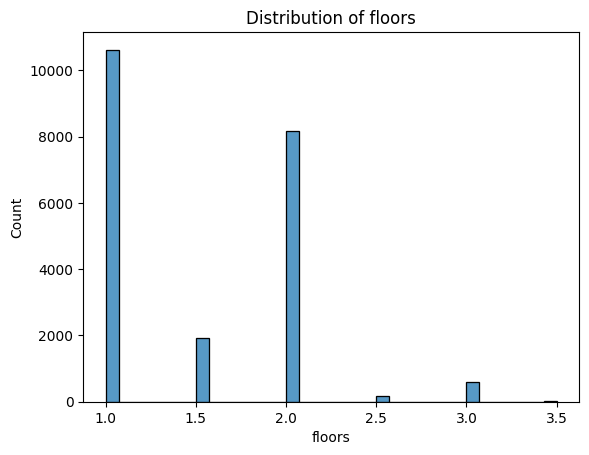

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Price distribution
sns.histplot(df['price'], )
plt.title('Distribution of House Prices')
plt.show()

# Other continuous features
num_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']
for col in num_cols:
    sns.histplot(df[col], )
    plt.title(f'Distribution of {col}')
    plt.show()


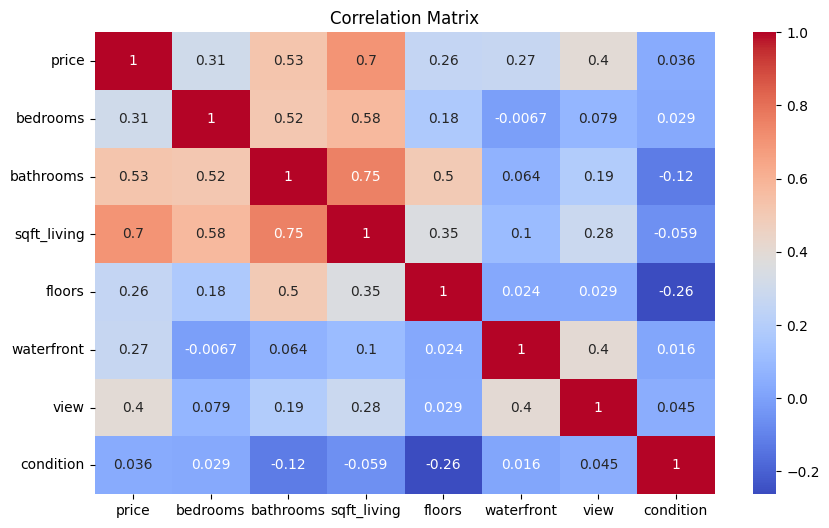

In [17]:
# Correlation matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


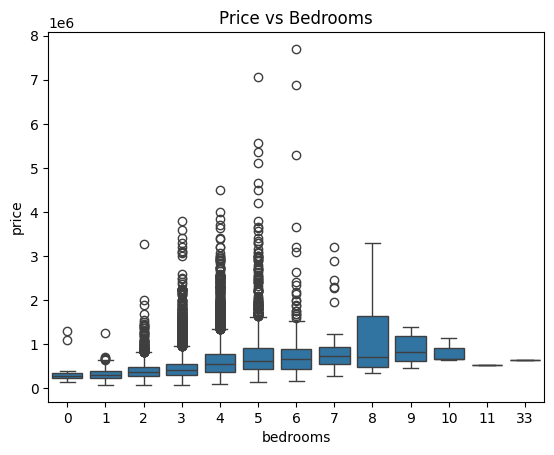

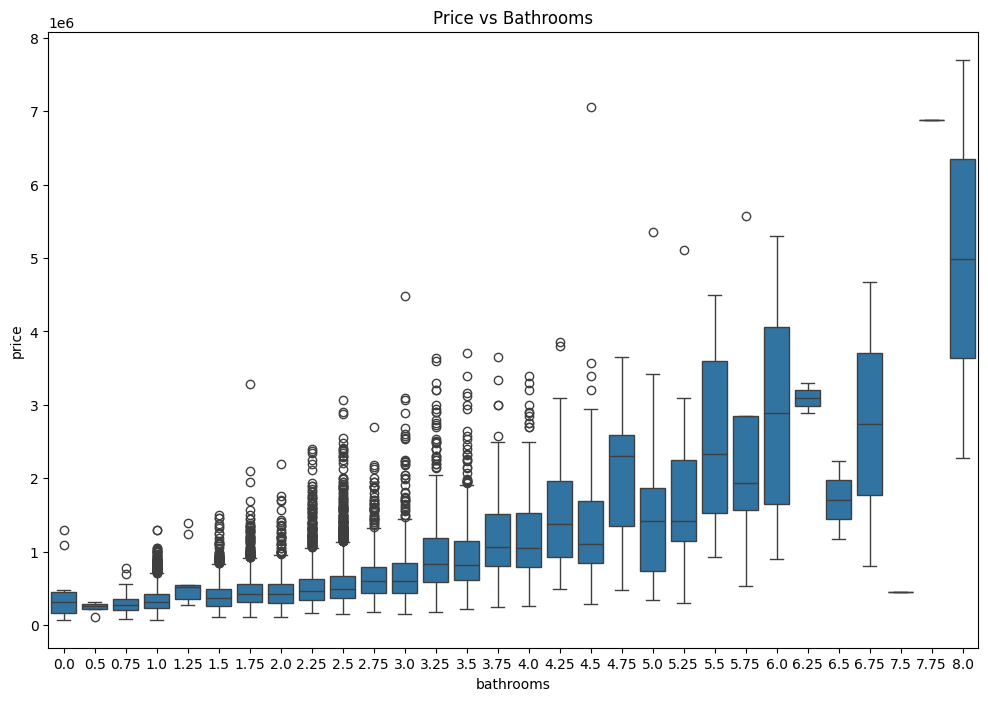

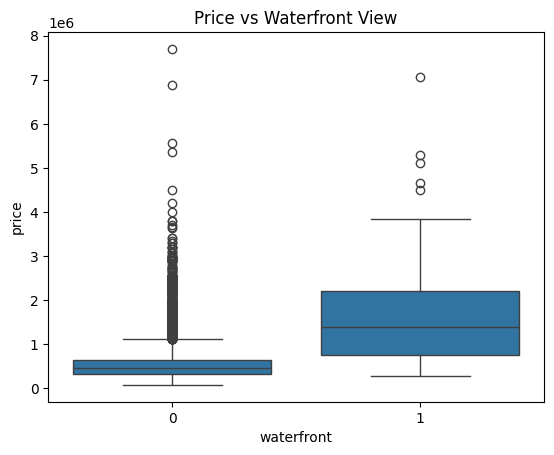

In [20]:
# Price vs Bedrooms

sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price vs Bedrooms')
plt.show()

# Price vs Bathrooms
plt.figure(figsize=(12,8))
sns.boxplot(x='bathrooms', y='price', data=df)
plt.title('Price vs Bathrooms')
plt.show()

# Price vs Waterfront
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price vs Waterfront View')
plt.show()


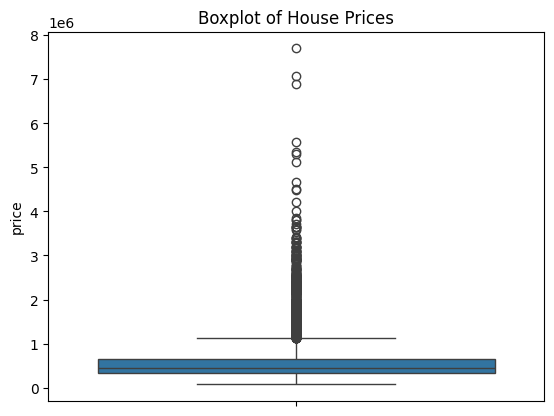

In [21]:
# Example: outliers in price
sns.boxplot(y='price', data=df)
plt.title('Boxplot of House Prices')
plt.show()


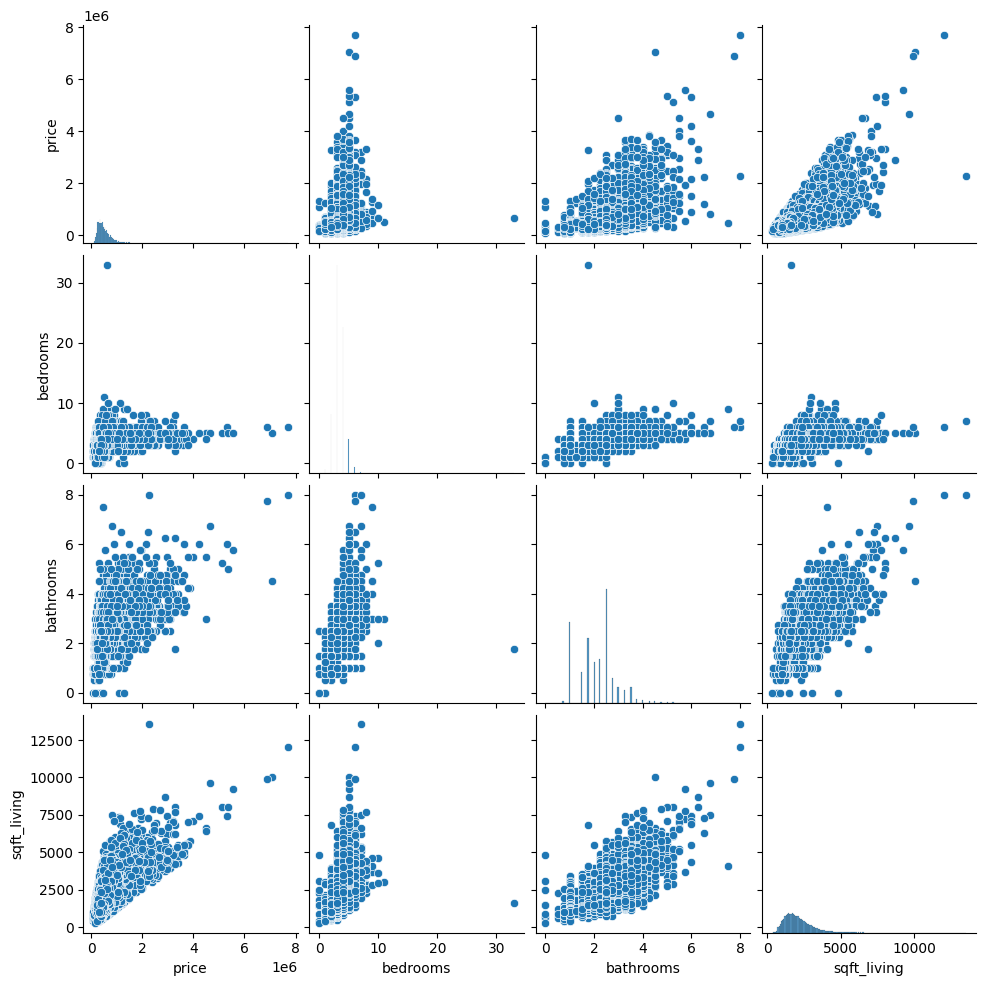

In [22]:
# For smaller datasets
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living']])
plt.show()


In [28]:
# Calculate Q1 and Q3
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Check shape after removing outliers
print("New shape after removing price outliers:", df.shape)



New shape after removing price outliers: (20036, 8)


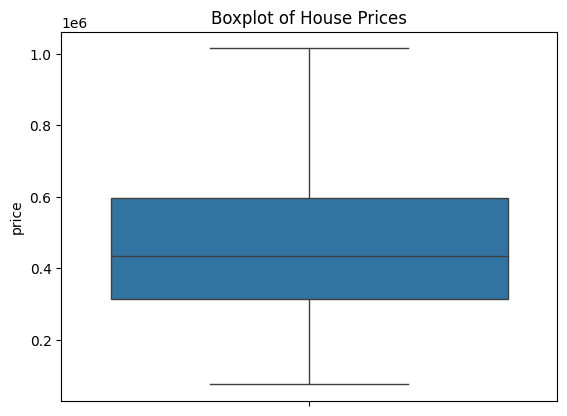

In [29]:
# Example: outliers in price
sns.boxplot(y='price', data=df)
plt.title('Boxplot of House Prices')
plt.show()


In [31]:
df.to_csv('cleaned_housing.csv')